### Constructing wave packet
Generate a series of x values varying from – 5 to +5. You may take interval of $0.01$ to generate $1001$ points (both limits included).  

Calculate $\cos(x)$ (assuming $x$ in $radians$) for each of $x$.  

Now have $24$ more columns with each having frequency component higher by a certain factor $df$, say, $0.1$  

This implies the first $cosine$ wave has frequency $1$ and the last one has frequency $1 + (24x0.1)$.  

Generate $cosine$ series for each frequency.  

Add all terms and plot the graph of $sum$ vs $x$. You get a wave packet.  

Now vary $df$ to $0.1$, $0.2$ and $0.5$ and see how the wave packet changes!

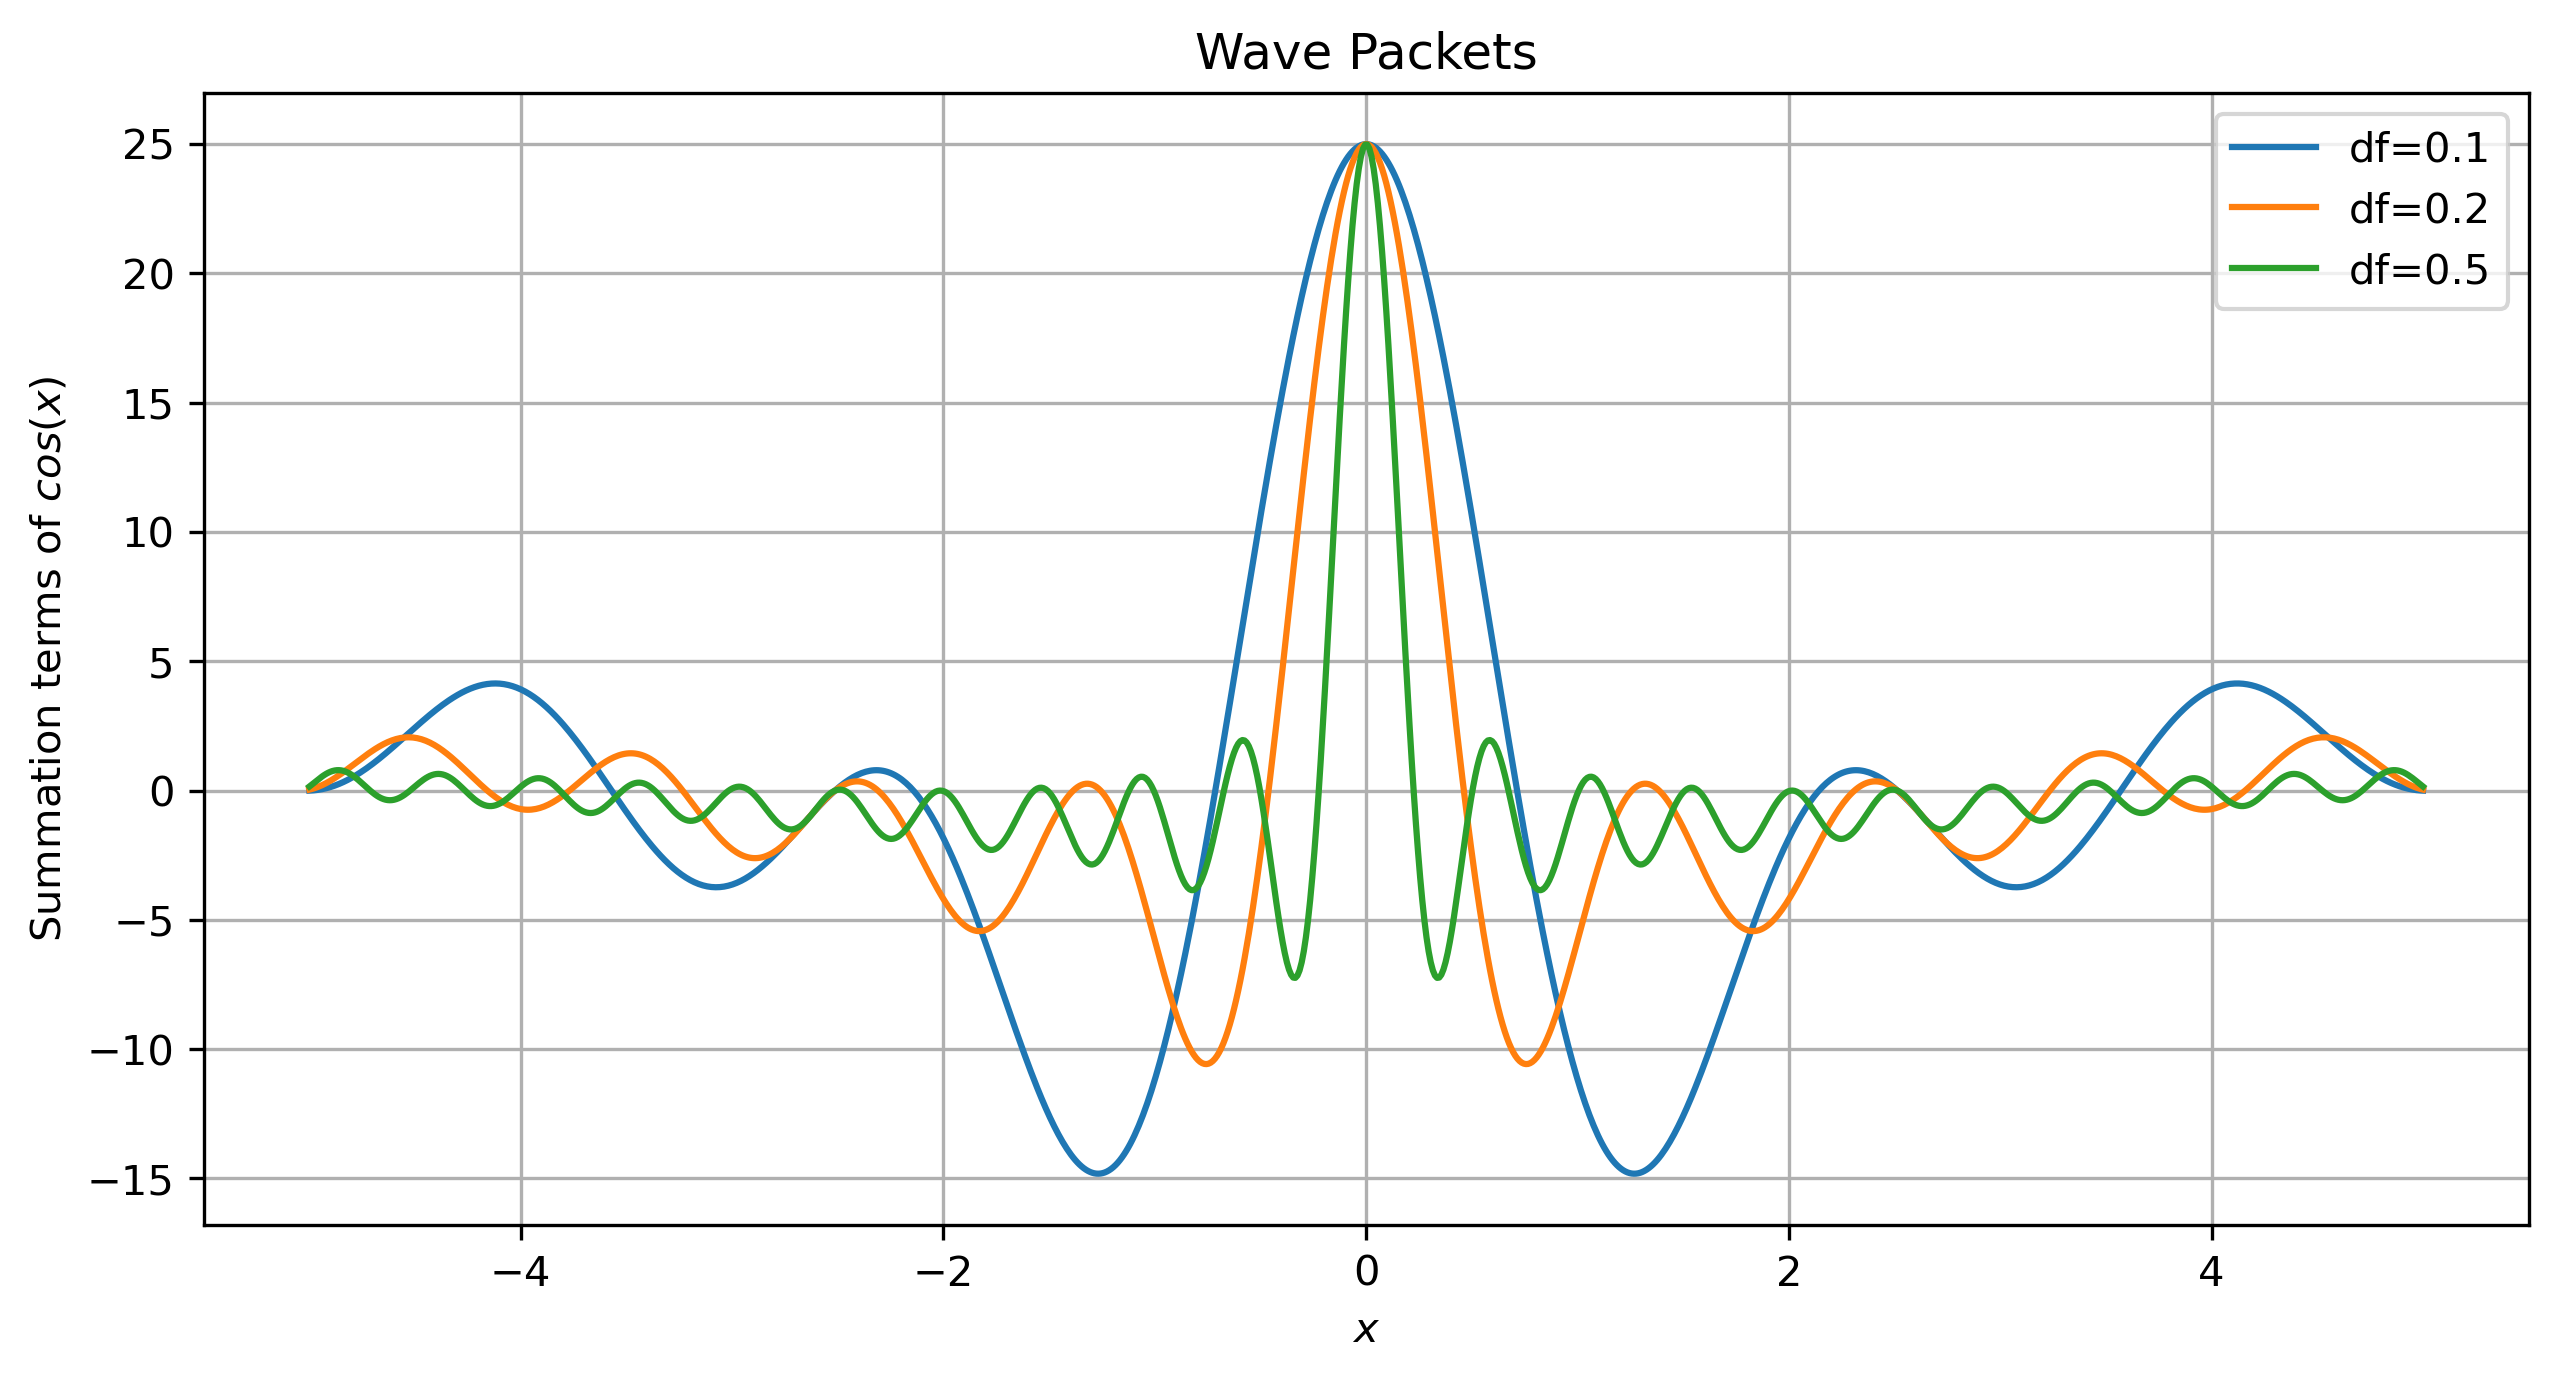

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,1000) # x values
df = [0.1,0.2,0.5] # factor
plt.figure(figsize=(10,5),dpi=300)
for e in range(len(df)):  # loop over different df values
    y = [[] for i in range(25)] # creating 25 lists -- basically columns
    
    '''no. of empty lists equivalent to no. of df elements to store 
       summation of elements.'''
    summation = [[] for i in range(len(df))] 
    
    # filling the columns with values of function
    for i in range(len(y)): 
        for j in range(len(x)): 
            y[i].append(np.cos(x[j]+(i*x[j]*df[e]))) 

    a =[[] for i in range(len(x))] # creating lists to store row elements
    for k in range(len(x)): 
        for l in range(25):
            a[k].append(y[l][k]) # adding each row element to list
        summation[e].append(np.sum(a[k])) 
        # summing the rows and appending it to ith list in summation
        
    # plot for each df   
    plt.plot(x,summation[e],label=f"df={df[e]}") 
    plt.legend()
    plt.grid(':')
    plt.xlabel("$x$")
    plt.ylabel("Summation terms of $cos(x)$")
    plt.title("Wave Packets")

# Solved Example from N. Zettili

### Problem 1.14

This problem is designed to illustrate the superposition principle and the concepts of modulating functions in a wave packet. Consider two wave functions $\psi_1(y,t)=5y\;\cos\;7t$ and $\psi_2(y,t)=-5y\;\cos\;9t$, where $y$ and $t$ are in meters and seconds, respectively. Show that their superposition generates a wave packet. Plot it and identify the modulated and modulating functions.  

Using the relation $$\cos\,(\alpha\;\pm\;\beta)=\cos\;\alpha\;\cos\;\beta\;\mp\;\sin\,\alpha\,\sin\,\beta$$
we can write the superposition of $\psi_1(y,t)\text{ and }\psi_2(y,t)$ as follows:
$$
\begin{align*}
    \psi(y,t) & = \psi_1(y,t)+\psi_2(y,t) = 5y\,\cos\,7t\,-\,5y\,\cos\,9t \\
    & = 5y(\cos\,8t\,cos\,t\,+\,\sin\,8t\,sin\,t)\,-\,5y(\cos\,8t\,cos\,t\,-\,\sin\,8t\,sin\,t) \\
    & = 10y\,\sin\,t\,\sin\,8t
\end{align*}
$$

The periods of $10y\,\sin\,t\text{ and }\sin\,8t$ are given by $2\pi$ and $2\pi/8$ respectively. Since the period of $10y\,\sin\,t$ is larger than that of $\sin\,8t$,  $10y\,\sin\,t$ must be the modulating function and $\sin\,8t$ the modulated function.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

def psi_1(y,t):
    return 5*y*np.cos(7*t)
def psi_2(y,t):
    return -5*y*np.cos(9*t)
def psi(y,t):
    return psi_1(y, t)+psi_2(y, t)
    #return 10*y*np.sin(t)*np.sin(8*t)


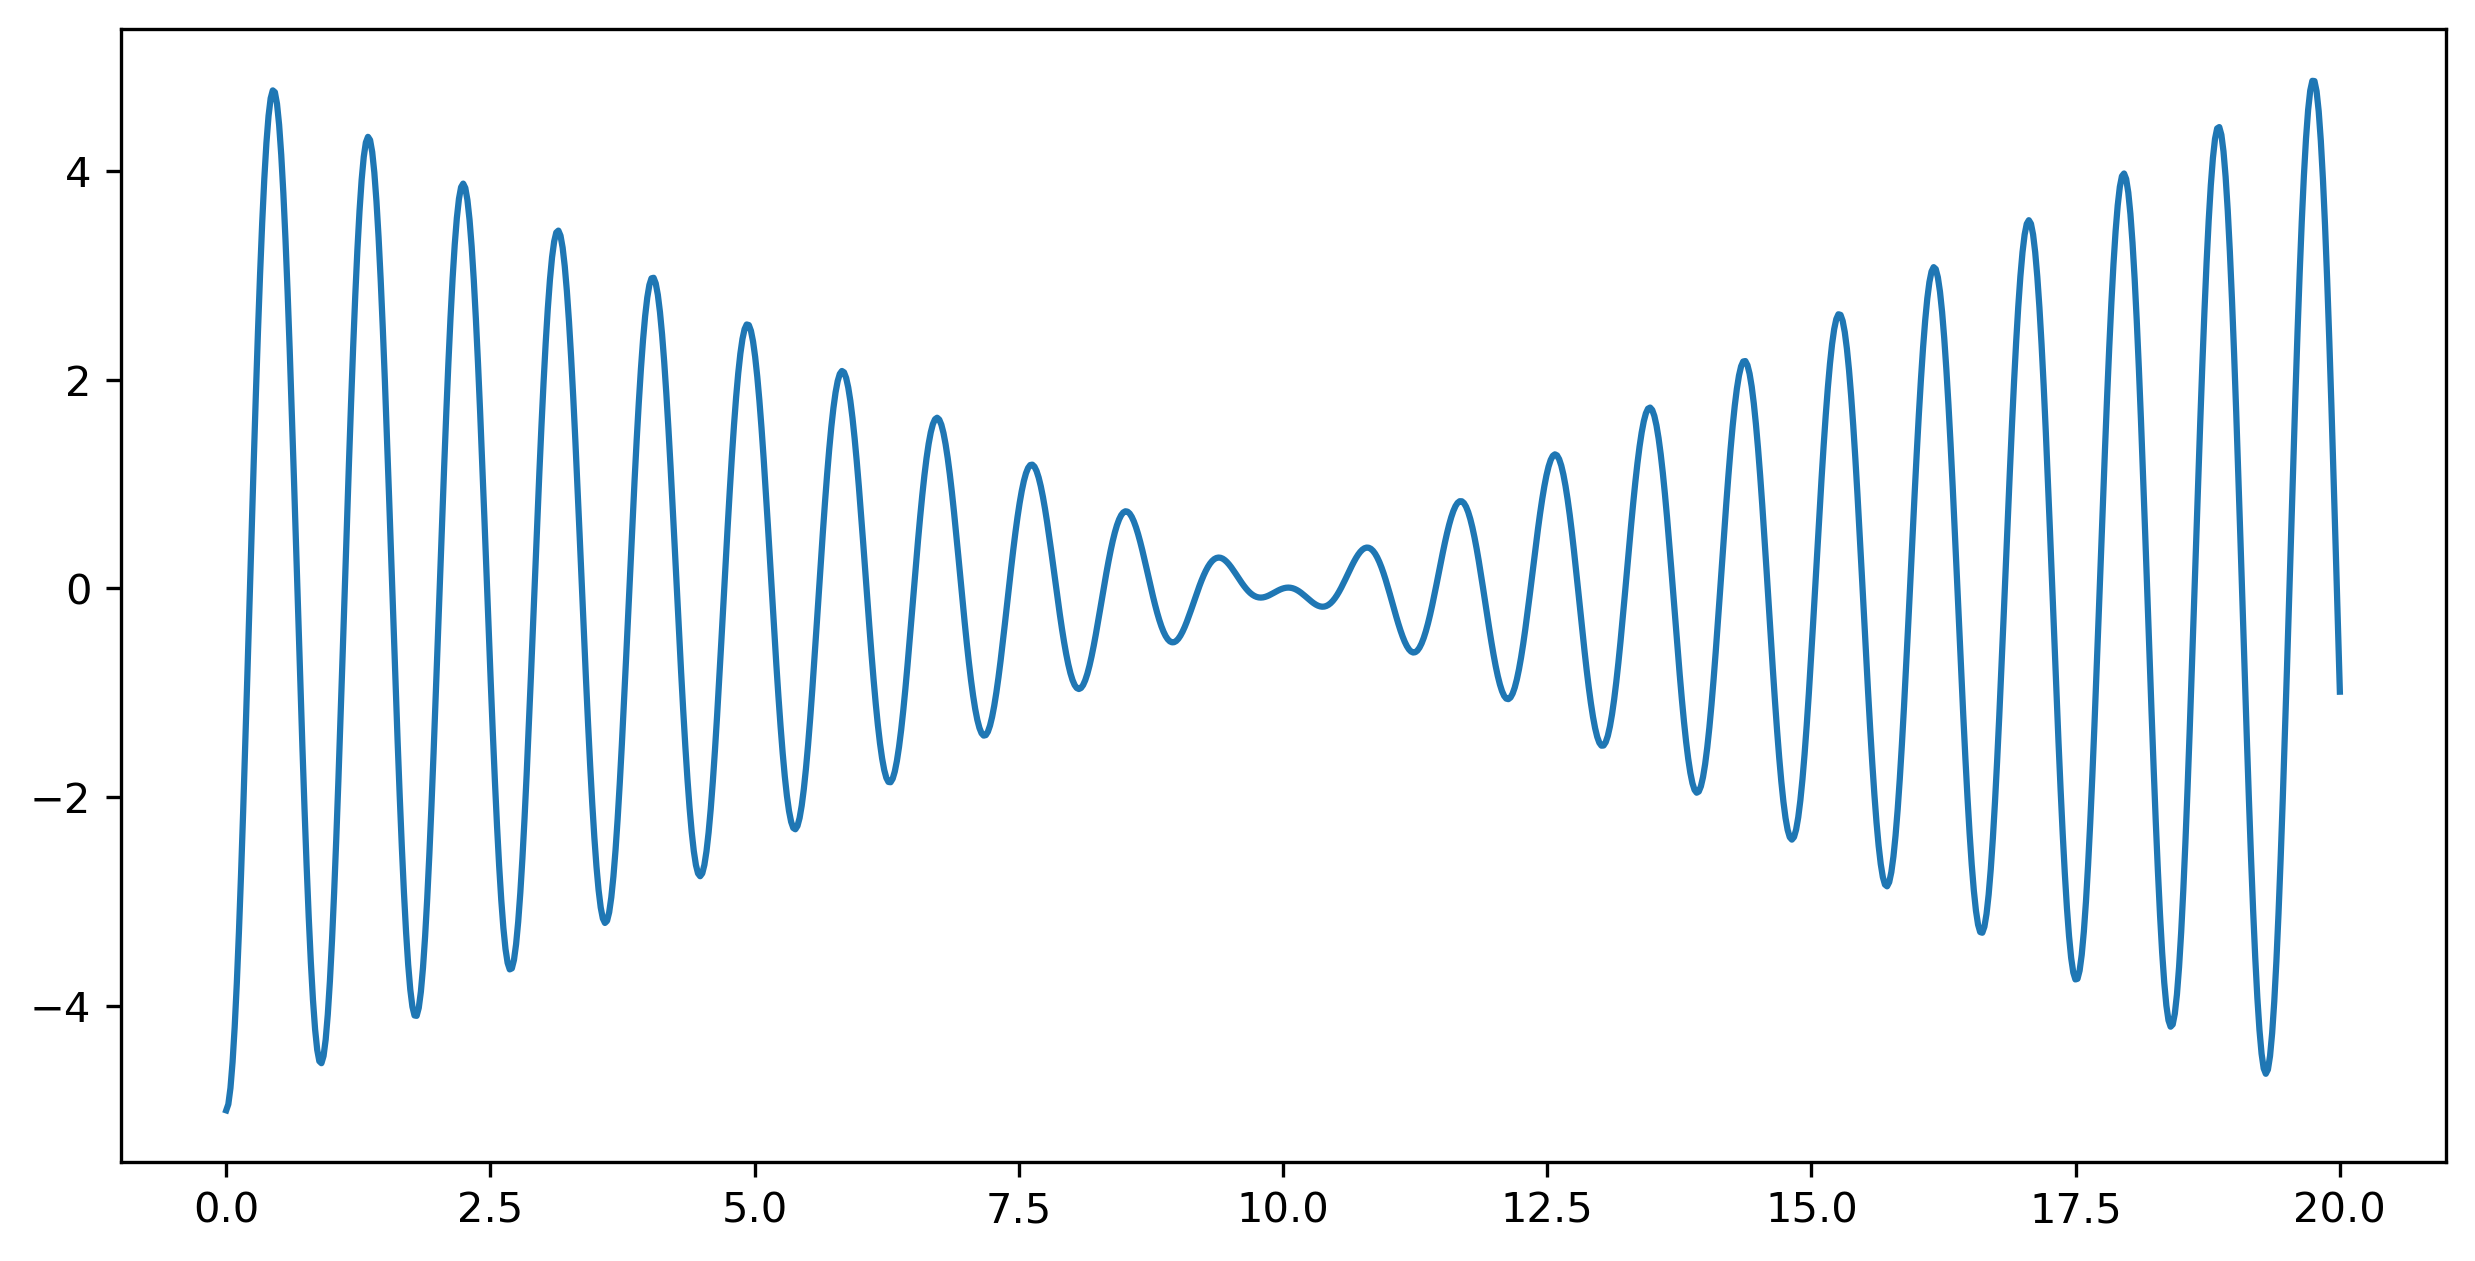

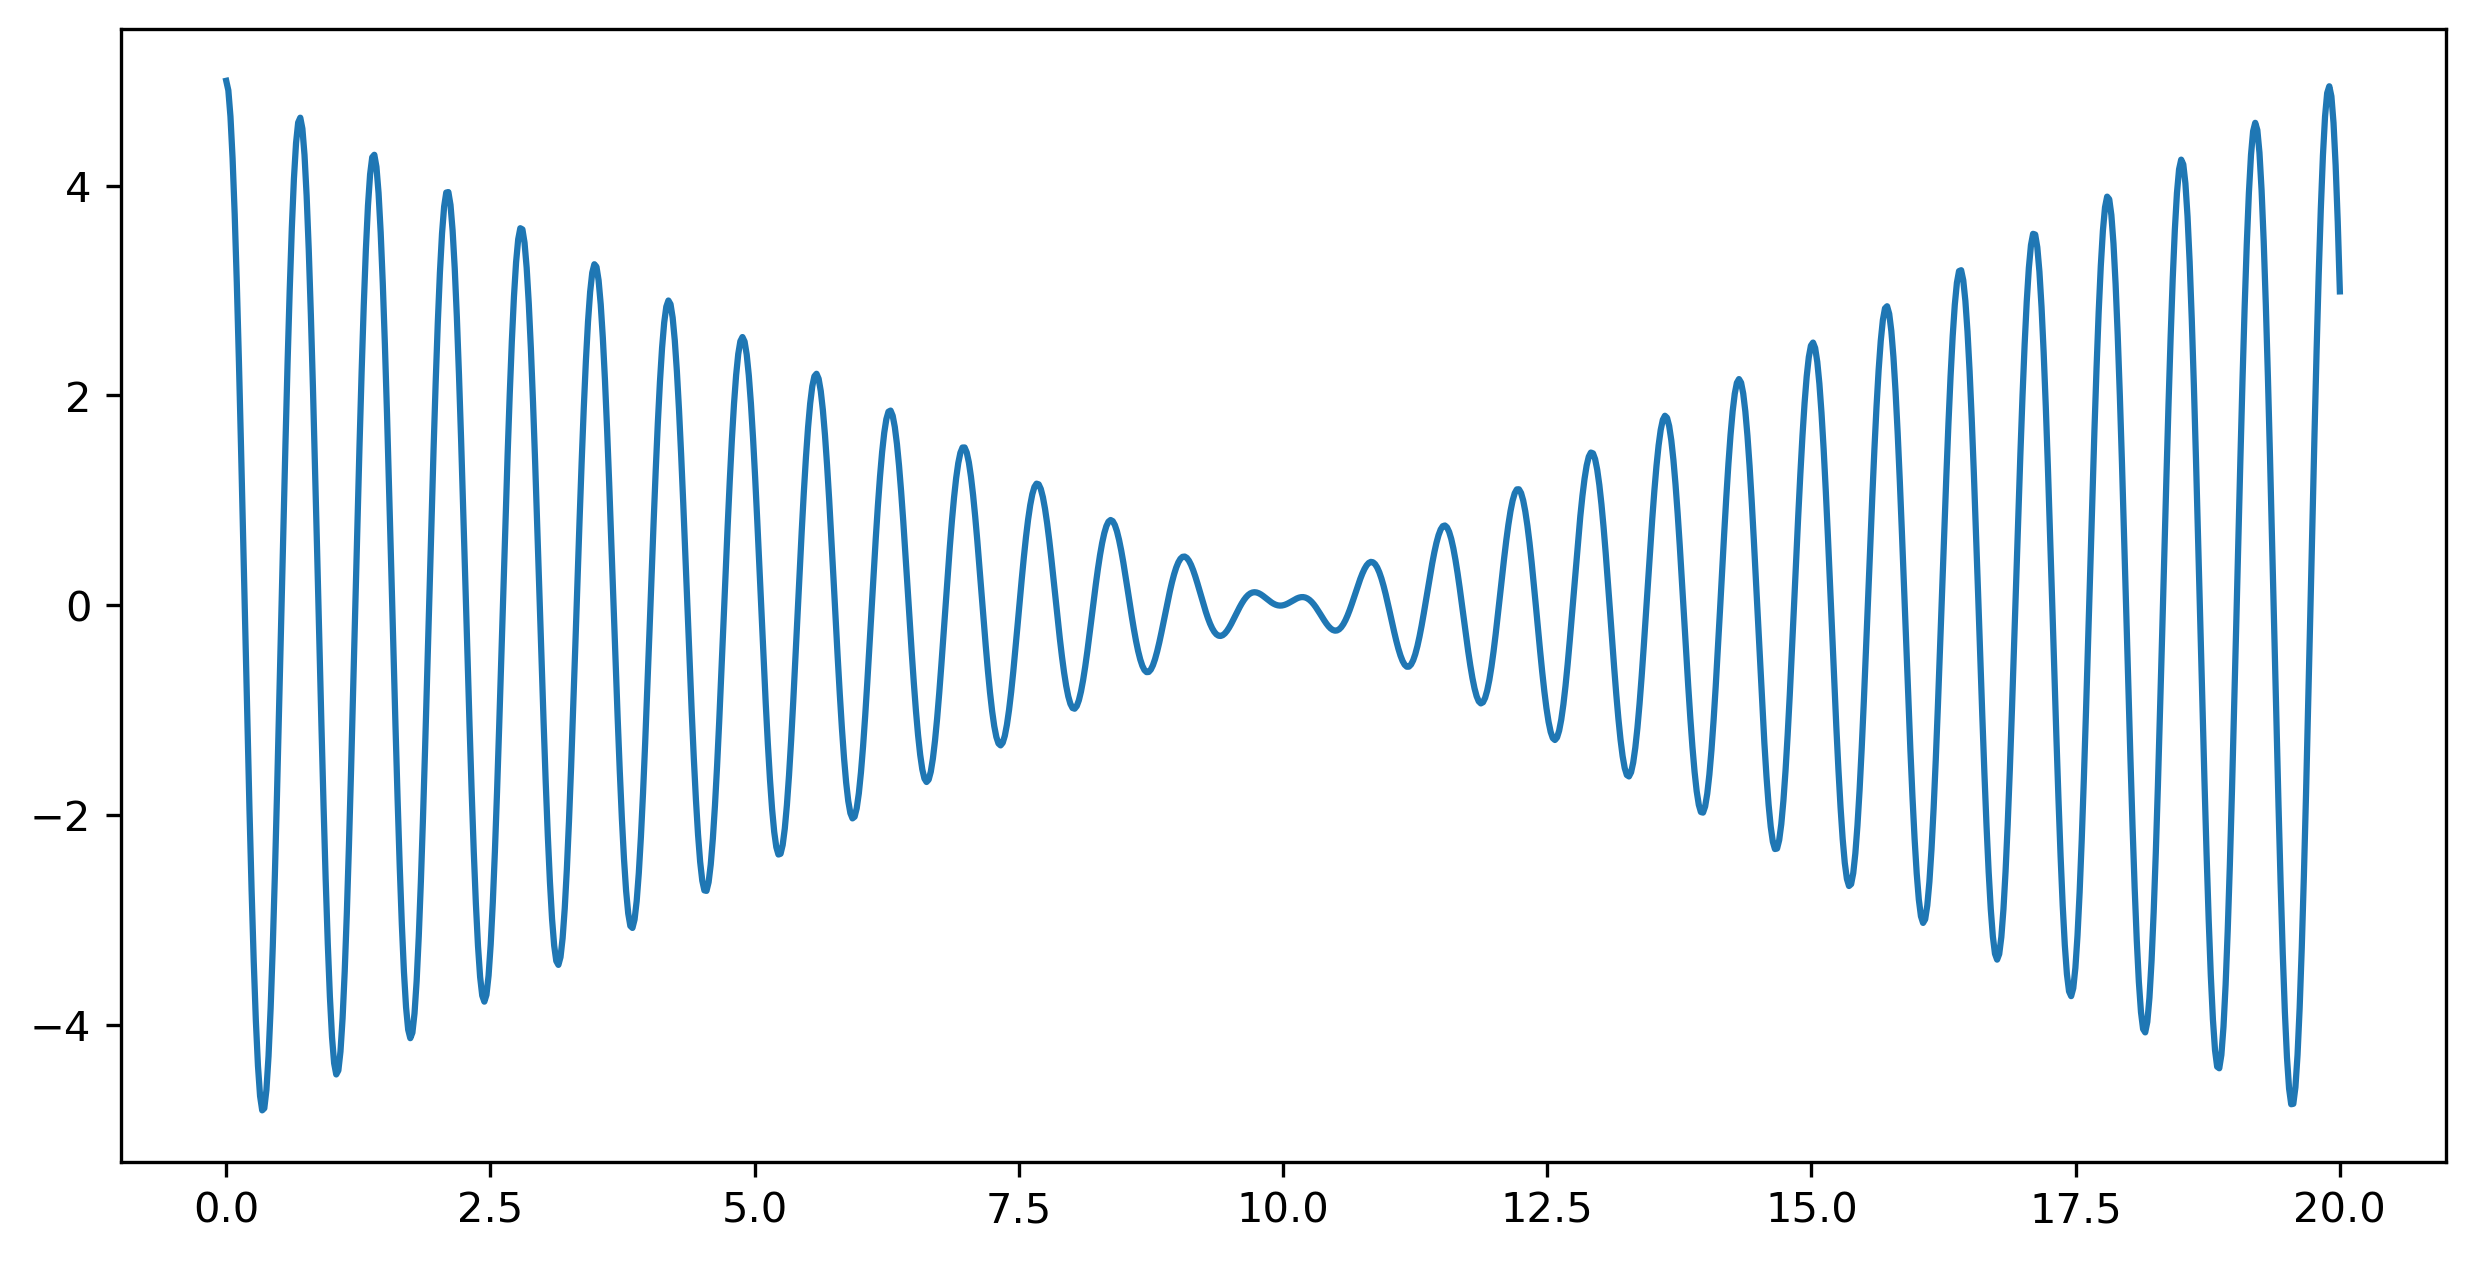

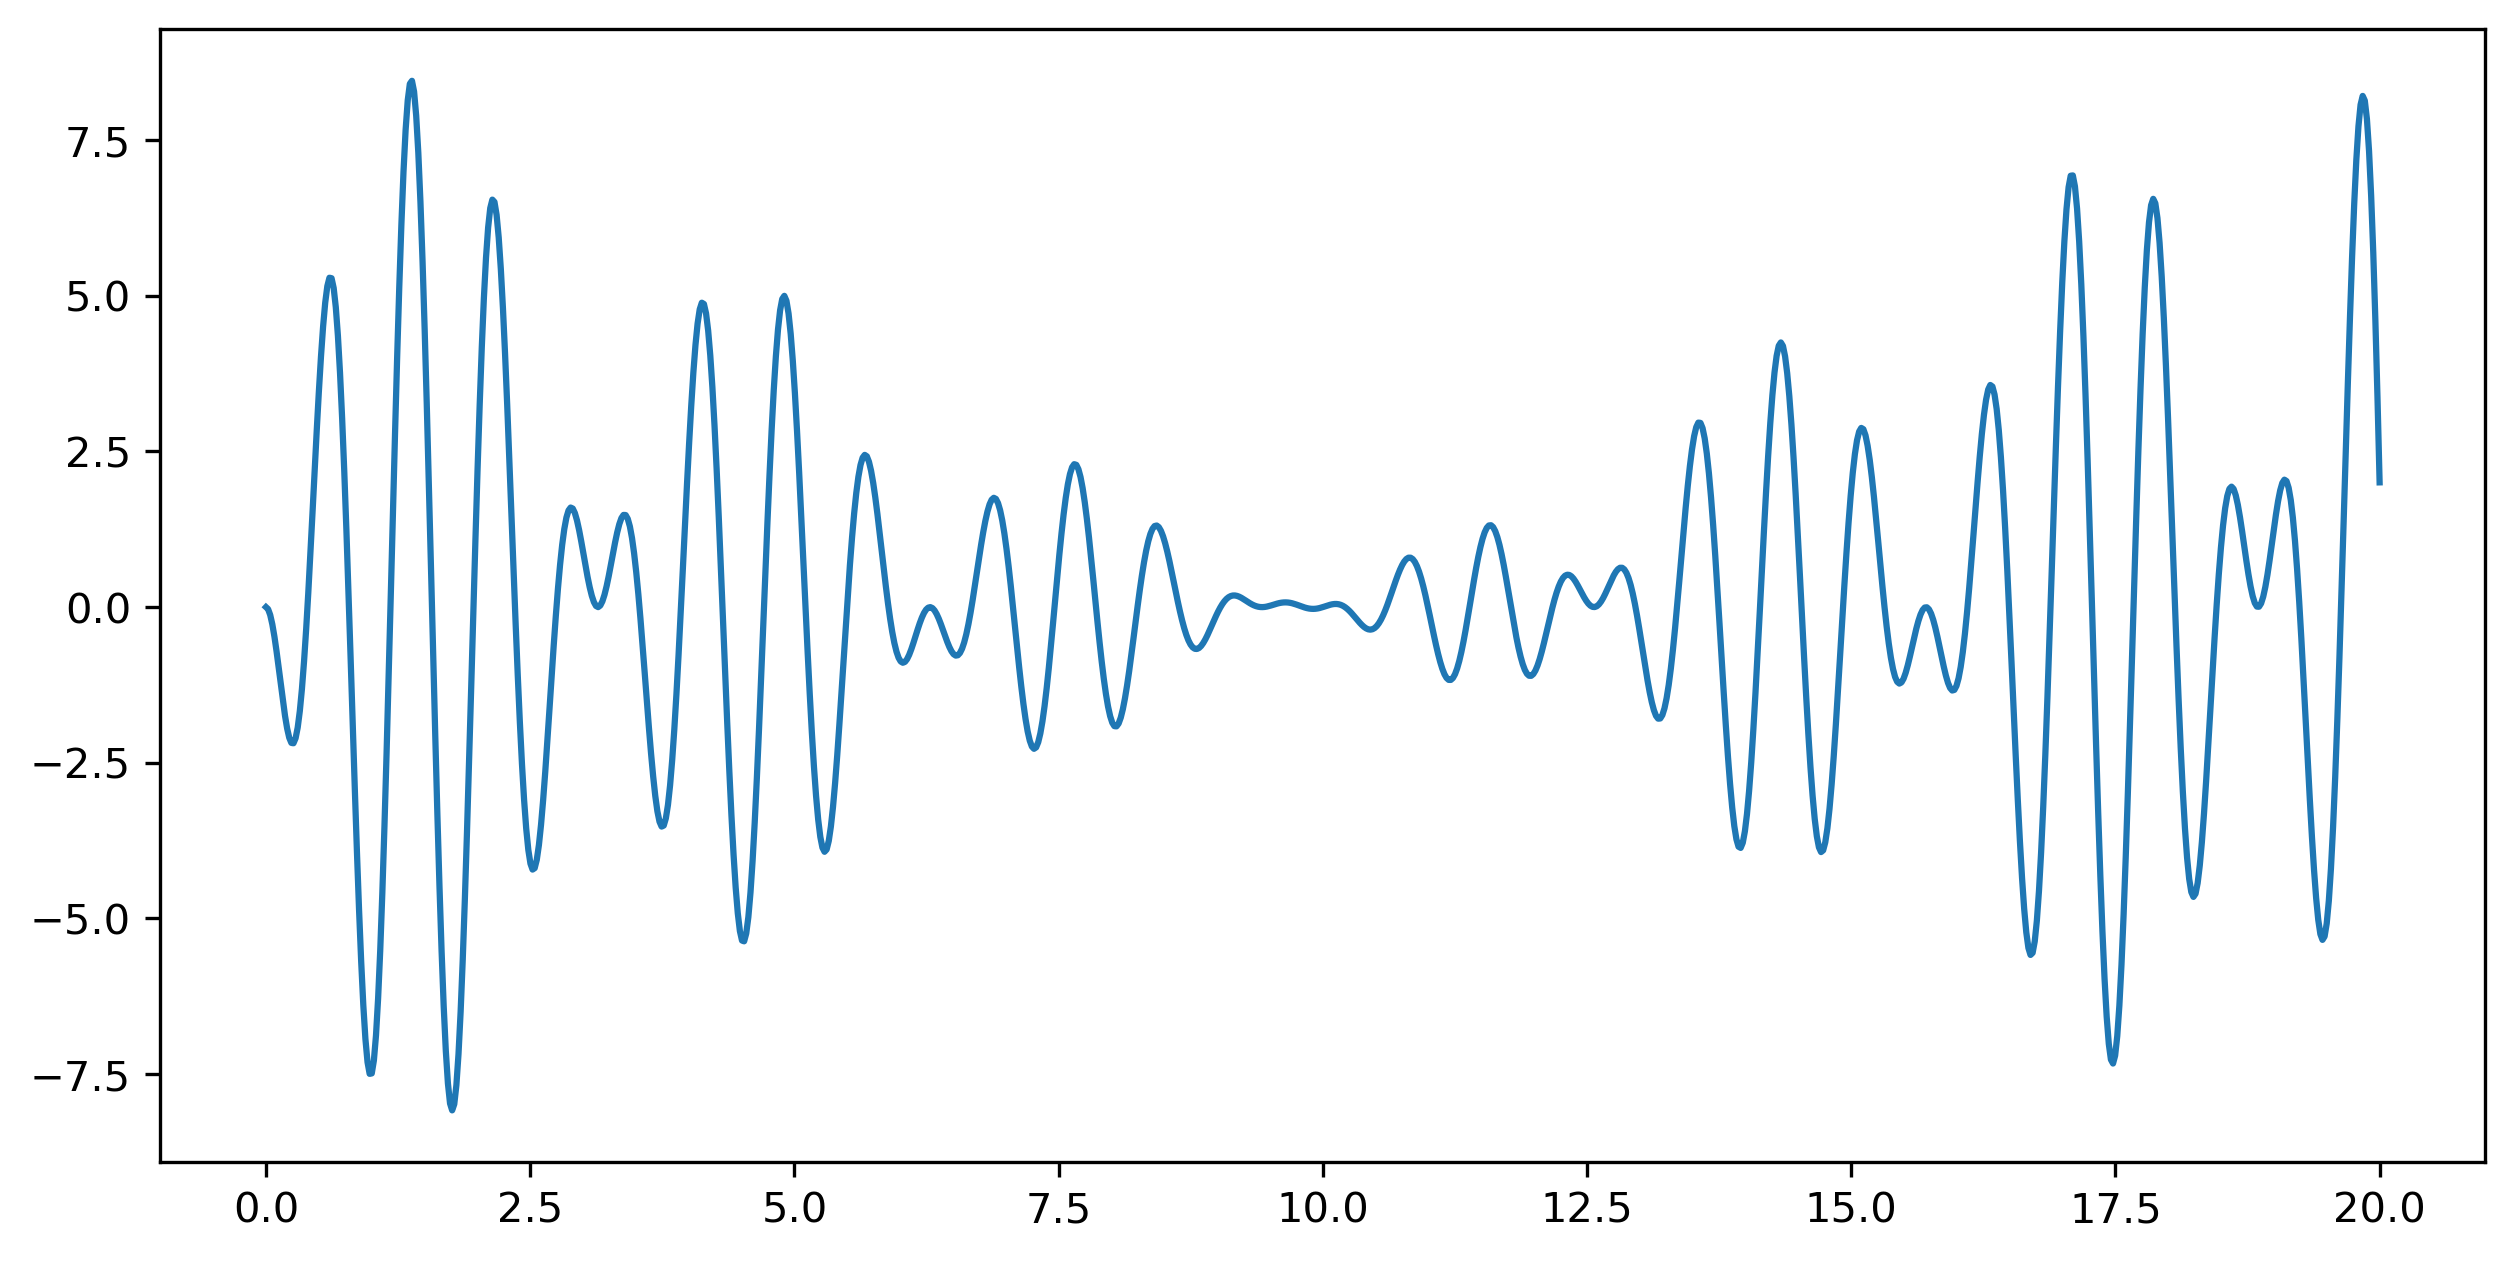

In [3]:
y = np.linspace(-1,1,1000)
t = np.linspace(0,20,1000)

p = [[] for i in range(3)]
for i in range(len(y)):
    p[0].append(psi_1(y[i],t[i]))
    p[1].append(psi_2(y[i],t[i]))
    p[2].append(psi(y[i],t[i]))
'''
fig,ax = plt.subplots(3,1,dpi=300)
ax[0].plot(t,p1,label="$\psi_1$")
ax[1].plot(t,p2,label="$\psi_2$")
ax[2].plot(t,p,label="$\psi_1+\psi_2$")
'''
for i in range(3):
    plt.figure(figsize=(10,5),dpi=300)
    plt.plot(t,p[i])